In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# DATA SOURCE


· Times Higher Education：world university rankings

https://www.timeshighereducation.com/cn/world-university-rankings

In [2]:
df = pd.read_csv('school ranking.csv',)
df

,World_Rank,University_Name,Country,%_Female_Students,Year
0,1,California Institute of Technology,United States of America,33.0,2012
1,2,Harvard University,United States of America,NaN,2012
2,2,Stanford University,United States of America,42.0,2012
3,4,University of Oxford,United Kingdom,46.0,2012
4,5,Princeton University,United States of America,45.0,2012
5,6,University of Cambridge,United Kingdom,46.0,2012
6,7,Massachusetts Institute of Technology,United States of America,37.0,2012
7,8,Imperial College London,United Kingdom,37.0,2012
8,9,University of Chicago,United States of America,42.0,2012
9,10,"University of California, Berkeley",United States of America,50.0,2012


In [3]:
def clean_us_name(s):
    if s == 'United States of America':
        return 'United States'
    else:
        return s
df['Country'] = df['Country'].apply(clean_us_name)

# World‘s Mean

selecting female data & see means of each year.

and then use the pivot table to come up with a new chart.

In [4]:
df['%_Female_Students'].mean()

50.15897634742148

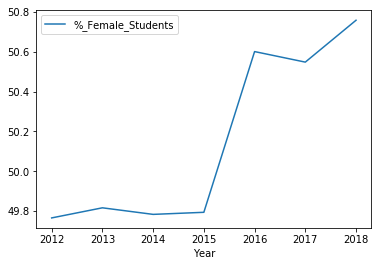

In [5]:
female_data_group_by_year = df.groupby('Year').mean()
female_data_group_by_year.plot()

In [12]:
pd.pivot_table(df, values='%_Female_Students', index='Country', columns='Year', aggfunc=np.min).T

Country,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Cyprus,Czech Republic,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,Unisted States of America,United Arab Emirates,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2012,44.0,27.0,54.0,48.0,45.0,NaN,29.0,NaN,NaN,62.0,...,12.0,30.0,27.0,27.0,63.0,34.0,NaN,NaN,37.0,25.0
2013,47.0,27.0,54.0,48.0,45.0,NaN,32.0,44.0,NaN,62.0,...,36.0,30.0,27.0,27.0,42.0,34.0,NaN,NaN,37.0,26.0
2014,44.0,27.0,54.0,48.0,45.0,NaN,31.0,44.0,NaN,62.0,...,36.0,30.0,27.0,27.0,42.0,34.0,NaN,NaN,37.0,26.0
2015,44.0,27.0,54.0,48.0,45.0,24.0,31.0,44.0,NaN,62.0,...,52.0,30.0,27.0,27.0,42.0,34.0,NaN,NaN,37.0,26.0
2016,44.0,22.0,54.0,48.0,45.0,NaN,32.0,NaN,69.0,49.0,...,52.0,30.0,27.0,27.0,NaN,39.0,NaN,NaN,37.0,26.0
2017,39.0,23.0,49.0,48.0,45.0,NaN,32.0,NaN,69.0,NaN,...,52.0,31.0,27.0,33.0,NaN,39.0,NaN,NaN,37.0,27.0
2018,43.0,29.0,50.0,48.0,46.0,NaN,22.0,NaN,57.0,NaN,...,53.0,31.0,28.0,33.0,NaN,41.0,NaN,46.0,37.0,28.0


# Find out the relationship between rank and female ratio

Firstly, we use the def fuction to delete the universities ranked in 201-400,

and select the ratio and the rank top 200 university to draw a chart 

then use the diffrent colors to stress the top 20 universities.

In [7]:
def convert_rank(s):
    try:
        return int(s)
    except:
        return 201
df['rank'] = df['World_Rank'].apply(convert_rank)

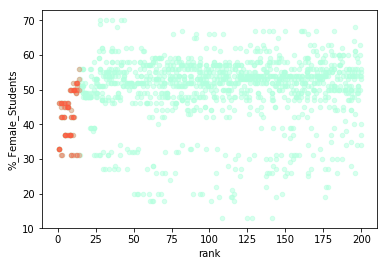

In [8]:
myax = df[
    (df['rank'] < 201)
].plot('rank', '%_Female_Students', kind='scatter', color='#B2FFDE', alpha=0.5)

df[
    (df['rank'] < 15)
].plot('rank', '%_Female_Students', kind='scatter', color='#FF5B3E', ax=myax, alpha=0.3)



In [9]:
df[df['University_Name'].apply(lambda x: 'Technology'in x)].mean()

%_Female_Students      30.846154
Year                 2014.967391
rank                  144.576087
dtype: float64

In [10]:
df[df['University_Name'].apply(lambda x: 'Technology'not in x)].mean()

%_Female_Students      51.513278
Year                 2015.003050
rank                  151.125048
dtype: float64

# Continental

set up groups by continents

see means of specific continents by years

The line chart shows Asia is the continental with the lowest ratio, while the Austrialian has the highest ratio.

In [13]:
state_mapping = {
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Taiwan': 'Asia',
    'Hong Kong': 'Asia',
    'Macau': 'Asia',
    'Macao': 'Asia',
    'Thailand': 'Asia',
    'Turkey': 'Asia',
    'Singapore': 'Asia',
    'Malaysia': 'Asia',
    'Saudi Arabia': 'Asia',
    'United Arab Emirates': 'Asia',
    'Maoco': 'Asia',
    'Canada': 'Americas',
    'United States': 'Americas',
    'Unisted States of America': 'Americas',
    'Canada': 'Americas',
    'Colombia': 'Americas',
    'Chile': 'Americas',
    'Mexico': 'Americas',
    'Brazil': 'Americas',
    'United Kingdom':'Europe',
    'Germany':'Europe',
    'Italy':'Europe',
    'Netherlands':'Europe',
    'France':'Europe', 
    'Sweden':'Europe',
    'Belgium':'Europe',
    'Switzerland':'Europe',
    'Spain':'Europe',
    'Finland':'Europe',
    'Denmark':'Europe',
    'Norway':'Europe',
    'Republic of Ireland':'Europe',
    'Russian Federation':'Europe',
    'Portugal':'Europe',
    'Ireland':'Europe',
    'Greece':'Europe',
    'Iceland':'Europe',
    'Estonia':'Europe',
    'Poland':'Europe',
    'Czech Republic':'Europe',
    'Cyprus':'Europe',
    'Luxembourg':'Europe',
    'Danmark':'Europe', 
    'Hungary':'Europe',
    'Austria':'Europe',
    'Australia':'Australian',
    'New Zealand':'Australian',
    'South Africa':'Africa',
    'Morocco':'Africa',
    'Egypt':'Africa',
    'Israel':'Middle_East',
    'Iran':'Middle_East'    
}
df['State'] = df['Country'].apply(lambda x: state_mapping.get(x, x))
df

,World_Rank,University_Name,Country,%_Female_Students,Year,rank,State
0,1,California Institute of Technology,United States,33.0,2012,1,Americas
1,2,Harvard University,United States,NaN,2012,2,Americas
2,2,Stanford University,United States,42.0,2012,2,Americas
3,4,University of Oxford,United Kingdom,46.0,2012,4,Europe
4,5,Princeton University,United States,45.0,2012,5,Americas
5,6,University of Cambridge,United Kingdom,46.0,2012,6,Europe
6,7,Massachusetts Institute of Technology,United States,37.0,2012,7,Americas
7,8,Imperial College London,United Kingdom,37.0,2012,8,Europe
8,9,University of Chicago,United States,42.0,2012,9,Americas
9,10,"University of California, Berkeley",United States,50.0,2012,10,Americas


In [15]:
pd.pivot_table(df, values='%_Female_Students', index='State', columns='Year', aggfunc=np.min).T

State,Africa,Americas,Asia,Australian,Europe,Middle_East
Year,,,,,,
2012,46.0,25.0,13.0,44.0,12.0,27.0
2013,53.0,26.0,13.0,47.0,18.0,27.0
2014,53.0,26.0,13.0,44.0,18.0,27.0
2015,46.0,24.0,13.0,44.0,18.0,27.0
2016,53.0,26.0,13.0,44.0,18.0,35.0
2017,53.0,27.0,7.0,39.0,18.0,35.0
2018,53.0,28.0,14.0,43.0,20.0,32.0


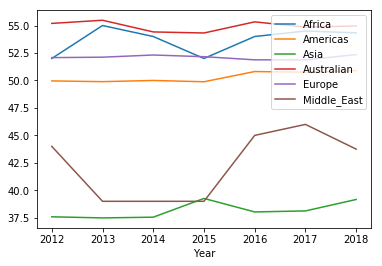

In [14]:
ax = pd.pivot_table(df, values='%_Female_Students', index='State', columns='Year').T.plot()

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right')

# Asia

we can find in the bar chart of Asia, means of the second country and the eight country dropped, meanwhile, the fourth country kept the lowest means all these years.
in terms of that, we found out those three countries are Japan, Thailand and India

In [16]:
Asia_data= df[df['State'] =='Asia']
Asia_data.sort_values(by='%_Female_Students', ascending=True)

,World_Rank,University_Name,Country,%_Female_Students,Year,rank,State
2396,201-400,Toyota Technological Institute,Japan,7.0,2017,201,Asia
530,128,Tokyo Institute of Technology,Japan,13.0,2013,128,Asia
926,125,Tokyo Institute of Technology,Japan,13.0,2014,125,Asia
1850,201-250,Tokyo Institute of Technology,Japan,13.0,2016,201,Asia
107,108,Tokyo Institute of Technology,Japan,13.0,2012,108,Asia
1161,351-400,Indian Institute of Technology Kanpur,India,13.0,2014,201,Asia
2297,201-400,Tokyo Institute of Technology,Japan,13.0,2017,201,Asia
1344,141,Tokyo Institute of Technology,Japan,13.0,2015,141,Asia
2699,251–300,Tokyo Institute of Technology,Japan,14.0,2018,201,Asia
632,226-250,Indian Institute of Technology Kharagpur,India,15.0,2013,201,Asia


[2009, 2019, 10, 60]

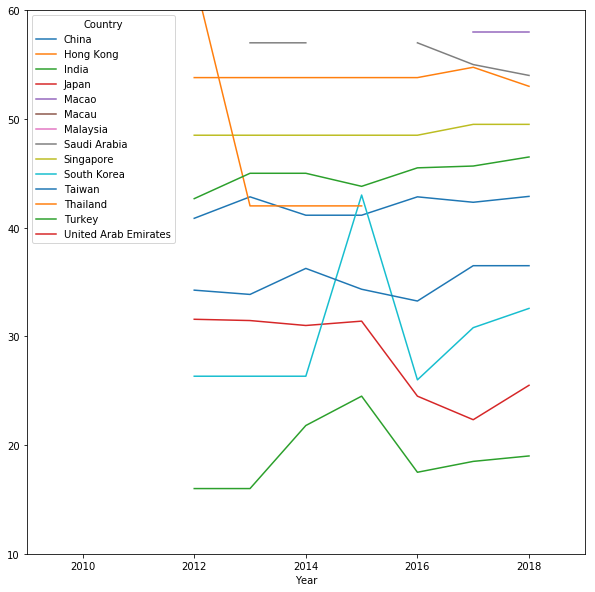

In [17]:
ax = pd.pivot_table(Asia_data, values='%_Female_Students', index='Country', columns='Year').T.plot(figsize=(10,10))
ax.axis([2009, 2019, 10, 60])

# Australian

we can find in the bar chart of Australian that there are only 2 countries,while the New Zealand is always the higher one.The reason may be that Austiralia has more universities than New Zealand which bring down the mean.

In [18]:
Australian_data= df[df['State'] =='Australian']
Australian_data.sort_values(by='%_Female_Students', ascending=True)

,World_Rank,University_Name,Country,%_Female_Students,Year,rank,State
2394,201-400,Swinburne University of Technology,Australia,39.0,2017,201,Australian
2539,134,University of Adelaide,Australia,43.0,2018,134,Australian
1577,351-400,Swinburne University of Technology,Australia,44.0,2015,201,Australian
1992,351-400,Swinburne University of Technology,Australia,44.0,2016,201,Australian
385,350-400,Swinburne University of Technology,Australia,44.0,2012,201,Australian
1178,351-400,Swinburne University of Technology,Australia,44.0,2014,201,Australian
2490,85,University of New South Wales,Australia,46.0,2018,85,Australian
2081,78,University of New South Wales,Australia,46.0,2017,78,Australian
917,114,University of New South Wales,Australia,47.0,2014,114,Australian
2146,142,University of Adelaide,Australia,47.0,2017,142,Australian


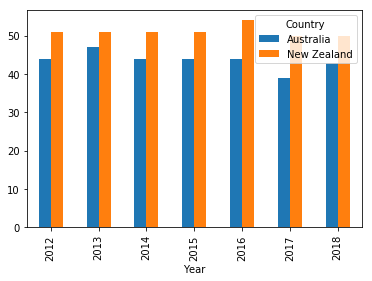

In [19]:
Australian=Australian_data[Australian_data['State'] == 'Australian']
pd.pivot_table(Australian, values='%_Female_Students', index='Country', columns='Year', aggfunc=np.min).T.plot.bar()

# Middle East

In [35]:
ME_data= df[df['State'] =='Middle_East']
ME_data.sort_values(by='%_Female_Students', ascending=True)

,World_Rank,University_Name,Country,%_Female_Students,Year,rank,State
322,301-350,Sharif University of Technology,Iran,27.0,2012,201,Middle_East
723,301-350,Sharif University of Technology,Iran,27.0,2013,201,Middle_East
1065,251-275,Sharif University of Technology,Iran,27.0,2014,201,Middle_East
1523,301-350,Sharif University of Technology,Iran,27.0,2015,201,Middle_East
2709,301-350,Babol Noshirvani University of Technology,Iran,32.0,2018,201,Middle_East
2746,301-350,Technion Israel Institute of Technology,Israel,34.0,2018,201,Middle_East
207,201-225,Technion Israel Institute of Technology,Israel,35.0,2012,201,Middle_East
595,193,Technion Israel Institute of Technology,Israel,35.0,2013,193,Middle_East
2349,201-400,Technion Israel Institute of Technology,Israel,35.0,2017,201,Middle_East
1014,201-225,Technion Israel Institute of Technology,Israel,35.0,2014,201,Middle_East


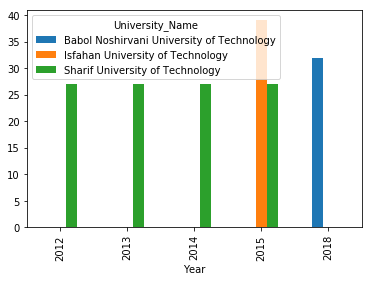

In [36]:
Iran=ME_data[ME_data['Country'] == 'Iran']
pd.pivot_table(Iran, values='%_Female_Students', index='University_Name', columns='Year', aggfunc=np.min).T.plot.bar()

# female ratio rank 

In [23]:
pd.pivot_table(df, values='%_Female_Students', index='Country', columns='Year').T.mean().sort_values(ascending=False)

Country
Poland                       67.000000
Malaysia                     66.000000
Iceland                      66.000000
Estonia                      66.000000
Cyprus                       65.000000
Greece                       62.714286
Czech Republic               59.400000
Macau                        58.000000
Macao                        58.000000
Finland                      56.767347
Ireland                      56.625000
Saudi Arabia                 56.000000
Spain                        55.985771
Republic of Ireland          55.720000
Norway                       55.071429
New Zealand                  55.026190
Canada                       54.967737
Australia                    54.885981
Belgium                      54.408163
South Africa                 54.261905
Sweden                       53.947619
Hong Kong                    53.821429
Italy                        53.379991
United Kingdom               53.213112
Mexico                       51.000000
Hungary          

# Canada

We pick Canada as an example to demonstrate that why this country have that kind of high female ratio at the same time have the base of so much universities.

And we find out the following possible reasons.

First is the high eduacation investment of the Cannada, in addition, there are many policy which are benifitial for the immigration and for the well-eduacted foreign woman to study in Canada. The last reason is the feminist movement which incresase the right of woman.

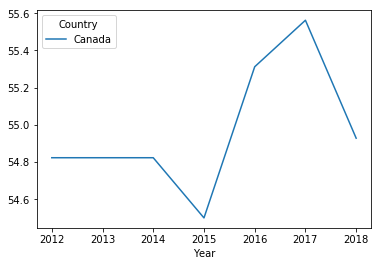

In [29]:
Canada_data= df[df['Country'] =='Canada']
ax = pd.pivot_table(Canada_data, values='%_Female_Students', index='Country', columns='Year').T.plot()
ax

# India

We sort the value of lowest ratio, find out the India is constantly the lowest one.

The reasons are follow, First, India has most the technology university which have lower rate of female students. It is also true for the whole world.

Another reason is the weak education for the Indian woman. 
And the prejudice hinder the Indian woman to get the higher education.

In [24]:
pd.pivot_table(df, values='%_Female_Students', index='Country', columns='Year').T.mean().sort_values(ascending=True)

Country
India                        19.042857
Chile                        24.000000
Japan                        28.251330
Iran                         29.200000
South Korea                  30.195918
Taiwan                       34.991497
China                        42.002551
Russian Federation           43.095238
Colombia                     44.000000
Turkey                       44.876190
Morocco                      46.000000
Egypt                        46.000000
United Arab Emirates         46.000000
Israel                       46.190476
Portugal                     47.216667
Thailand                     47.250000
Danmark                      48.000000
Brazil                       48.000000
Switzerland                  48.215986
Netherlands                  48.549451
France                       48.596226
Singapore                    48.785714
Denmark                      49.342857
Germany                      49.404508
Austria                      49.445238
United States    

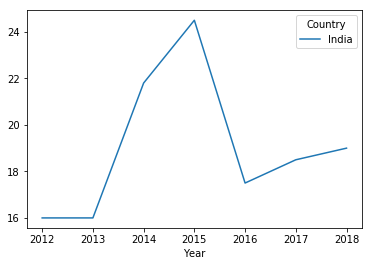

In [28]:
India_data= df[df['Country'] =='India']
ax = pd.pivot_table(India_data, values='%_Female_Students', index='Country', columns='Year').T.plot()
ax

In [31]:
India_data[India_data['University_Name'].apply(lambda x: 'Technology'in x)].mean()

%_Female_Students      16.153846
Year                 2014.461538
rank                  201.000000
dtype: float64

In [34]:
India_data[India_data['University_Name'].apply(lambda x: 'Technology'not in x)].mean()

%_Female_Students      28.500000
Year                 2015.833333
rank                  201.000000
dtype: float64

In [37]:
df[df['University_Name'].apply(lambda x: 'Technology'in x)].mean()

%_Female_Students      30.846154
Year                 2014.967391
rank                  144.576087
dtype: float64

In [38]:
df[df['University_Name'].apply(lambda x: 'Technology'not in x)].mean()

%_Female_Students      51.513278
Year                 2015.003050
rank                  151.125048
dtype: float64